# Programación orientada a objetos

Hasta ahora hemos estudiado:

- Variables: strings, números, listas, tablas de pandas.
- Estructuras de control: if, if-else, for.
- Lectura y escritura de información en archivos .xsls, .txt y .csv.
- Funciones;: Definición.

Todos estos elementos permiten construir programas muy complejos usando **objetos**.

Un objeto es es una abstracción computacional que contiene realiza alguna (o varias) cosa. 

Los objetos tienen **atributos** y **funciones**.

Los atributos son las variables que definen a un objeto. 

Los métodos de una clase son las funcionalidades que tiene el objeto. 

Estas propiedades permiten tomar código de librerías, e implementarlo para nuestras propias necesidades sin tener que volver a escribir todo el código ya hecho dentro de las librerías. Reutilizar código de librerías consiste en implementar objetos dentro de las librerías.





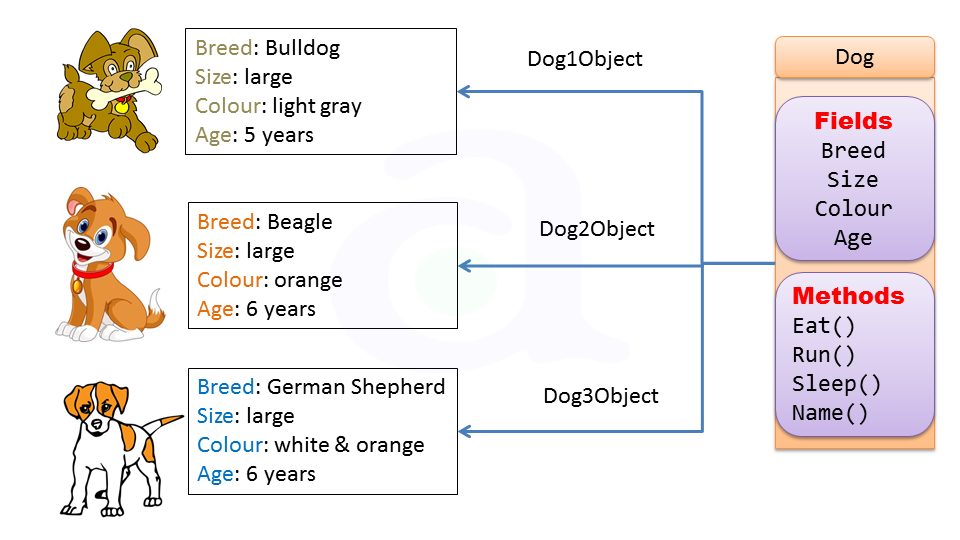

# spaCy

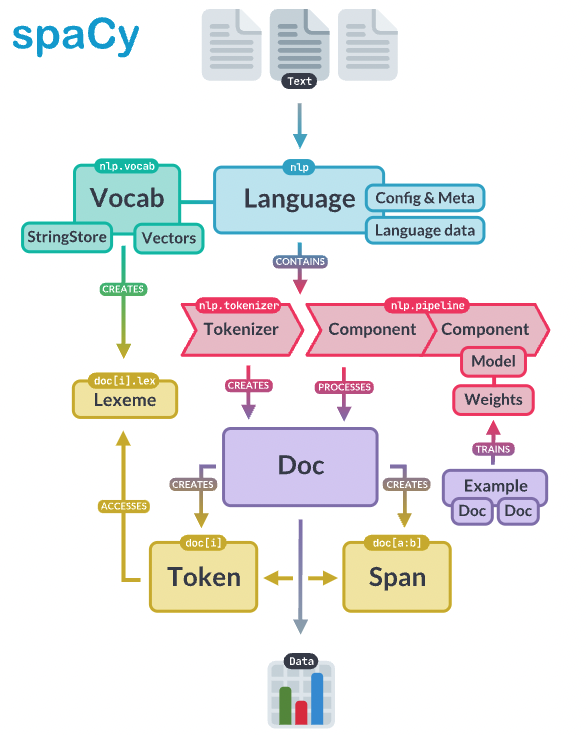

Es una librería de Python para hacer procesamiento del lenguaje natural. Nos permite:

- Trabajar con más de 64 lenguas.
- Modelos para 19 lenguas.
- Uso de transformadores.
- Vectores de palabras pre-entrenados.
- Velocidades del estado del arte.
- Tokenizar con reglas lingüisticas.
- Componentes de reconocimiento de entidades nombradas, part-of-speech tagging, segmentación de oraciones, clasificación de textos, lemmatización, análisis morfológico, y análisis de entidades dependientes.
- Visualizadores de sintaxis.
- Extender su librería para hacer aplicaciones particulares.

https://spacy.io/

In [ ]:
! python -m spacy download es_core_news_sm

# Primera sesión: Principales técnicas del procesamiento del lenguaje natural con Python

En esta sesión abordaremos los siguientes temas:

1.1 **Tokenización**: Qué es, cómo realizarlo. Ejercicio: Probar varios modelos de spaCy en la tokenización de un texto y analizar las diferencias en las tokens generadas.

1.2  **Lemmatización**: Qué es, cómo realizarlo, cómo escribir casos especiales o que no estén dentro de los modelos de spaCy.

1.3  **Part-of-Speech Tagging**: Qué es, cómo se hace en spaCy, cómo entender las etiquetas. Ejercicio de desambigüación de oraciones usando POS.

1.4  **Relaciones sintácticas**: Cómo hacer análisis de dependencias sintácticas con spaCy, cómo buscar la descripción de las etiquetas de spaCy. Ejercicio: Obtener la lista de dependencias sintácticas de una oración. ¿Qué significa ROOT y qué tiene que ver esa token con las demás ?

1.5  Ejercicio a casa: Dada una oración en la que el autor expresa un deseo, escribir un programa que regrese un mensaje con el verbo + lo que desea el autor. Ejemplo: “Quiero volar a Colmbia.” El programa debe tener un corrector del lemma “Colmbia” por “Colombia”, un etiquetado que identifique al verbo y luego al sustantivo.

## 1.1 Tokenización 

Al tratar con texto de manera computacional, el primer paso siempre debe ser realizar la **tokenización** del texto. Esto se refiere a separar los elementos dentro de un texto en **tokens**, las cuales puede ser palabras, números o signos de puntuación. 

Este proceso se lleva a cabo antes de cualquier otra operación, pues para realizar lo que sea se necesita ya tener las tokens de un texto extraídas en una variable de Python.

In [2]:
# Primero importamos la librería spaCy a nuestra notebook.
import spacy
# También importamos el modelo de spaCy en español llamado "es_core_news_sm".
import es_core_news_sm

# Luego creamos la variable nlp, la cual contendrá el modelo
# de spaCy en español llamado "es_core_news_sm".
nlp = es_core_news_sm.load()

# Finalmente creamos la variable doc, la cual guardará el contenido
# de pasar un string por la variable nlp.
doc = nlp('Este es un curso para lingüistas.')

La variable `nlp` de spaCy tiene dos funciones. La primera es cargar un modelo de lenguaje que nosotros escojamos. Una vez cargado un modelo, utilizamos la variable `nlp`, ahora ya con información lingüística dentro de dicha variable, para procesar un texto con el que deseemos trabajar.

En el siguiente ejemplo, imprimiremos cada token del texto que pasamos por la variable `nlp` anteriormente. Para imprimir cada token, usaremos un ciclo `for`, pues, recordemos, este nos sirve para pasar por todos los elementos dentro de una variable que contiene más de un elemento. En este caso la variable `doc` contiene el resultado de procesar un string con la variable `nlp` que a su vez contiene un modelo en español.

La variable `doc` contiene mucha información lingüística acerca del texto procesado por `nlp`. Para acceder a dicha información, se requiere especificarle a Python qué queremos. En este caso le diremos que nos imprima el `.text` de la variable `doc`, el cual contiene los **tokens**.

In [3]:
for token in doc:
  print(token.text)

Este
es
un
curso
para
lingüistas
.


In [4]:
# Guardamos los tokens en una lista.
tokens_del_texto = []

for token in doc:
  tokens_del_texto.append(token.text)

In [5]:
print(tokens_del_texto)

['Este', 'es', 'un', 'curso', 'para', 'lingüistas', '.']


¿ Por qué piensan que es útil tokenizar un texto antes de hacer cualquier cosa con él ?

## 1.2 Lematización

Un **lemma** la forma base de un token. 
La **lematización** es el proceso de reducir las tokens a sus lemas.

Obtener un lemma es casi igual que obtener un token. Sólo que esta vez, a la variable `doc` (que contiene nuestro texto pasado por el modelo de lenguaje especificado) le ponemos un `.lemma_`.

In [13]:
# Primero importamos la librería spaCy a nuestra notebook.
import spacy
# También importamos el modelo de spaCy en español llamado "es_core_news_sm".
import es_core_news_sm

# Luego creamos la variable nlp, la cual contendrá el modelo
# de spaCy en español llamado "es_core_news_sm".
nlp = es_core_news_sm.load()

doc = nlp('Veamos a qué nos referimos con este proceso.')

print(' Tokens ', '|', ' Lemmas ')
print('-----------------------' )

for token in doc:
  print('{:10} {:10}'.format(token.text, token.lemma_))

 Tokens  |  Lemmas 
-----------------------
Veamos     Veamos    
a          a         
qué        qué       
nos        no        
referimos  referir   
con        con       
este       este      
proceso    procesar  
.          .         


¿Por qué piensan que es útil lemmatizar un texto antes de trabajar con él?

Es útil en la medida en que lemmatizar es abstraer la forma canónica de la palabra y no es necesario buscar en todo el corpus sus diferentes formas, sino que se puede operar con un solo lema. 

### Ejemplo:

Un cliente desea comprar un vuelo. Al introducir en la página web de una aerolínea el texto `I am flying to Frisco`, el sistema lemmatiza el texto y cambia `flying` por `fly`. Eso le permite buscar con mayor facilidad en su base de datos la palabra `fly`, que ya esta guardada con un significado particular. Esto facilita el procesamiento, pues cualquier variación de `fly` que cualquier usuario ingrese, el sistema automáticamente lo cambiará por `fly` y sólo tendrá que hacer una búsqueda y no muchas.

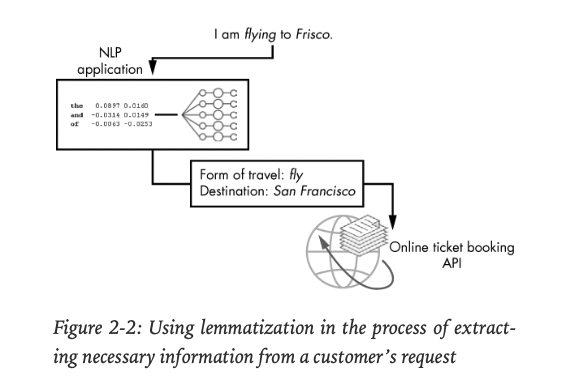

In [54]:
nlp.pipe_names # línea para consultar los pipelines con los que viene el pipeline de procesamiento nlp

['tagger', 'parser', 'ner']

In [1]:
import spacy

# Importamos ORTH y LEMMA y TAG para poder agregar una regla de lemmatización a mano.
from spacy.symbols import ORTH, LEMMA, TAG

# Ahora la variable nlp contendrá un modelo en inglés, pues para este
# ejemplo introduciremos un string en inglés.
nlp = spacy.load('en')

# Nuevamemnte pasamos un texto por la variable nlp, la cual ahora contiene
# un modelo en inglés.
doc = nlp('I am flying to Frisco.')

# Imprimimos los tokens del texto introducido.
print('TEXT', 'LEMMA', 'POS', 'TAG', sep= '\t\t')
print('-----------------------------------------------------')
for token in doc:
  print(token.text, token.lemma_, token.pos_, token.tag_, sep= '\t\t')

TEXT		LEMMA		POS		TAG
-----------------------------------------------------
I		-PRON-		PRON		PRP
am		be		AUX		VBP
flying		fly		VERB		VBG
to		to		ADP		IN
Frisco		Frisco		PROPN		NNP
.		.		PUNCT		.


### Debemos añadir el lema a la tabla de búsqueda de lemas del vocabulario de la clase `nlp`

In [2]:
lemma_lookup = nlp.vocab.lookups.get_table('lemma_lookup')
lemma_lookup["Frisco"] = "San Francisco"

In [ ]:
# lemma_lookup.popitem() #línea para borrar el último elemento añadido a la tabla, es decir, por si se quiere borrar algo añadido a la tabla

Como se sabe, vemos que el token `Frisco` corresponde a una ciudad que no reconoce el lematizador de SpaCy. Por lo tanto, introduciremos manualmente una regla que le diga a Python que cuando vea un token `Frisco` el lema que le asigne sea `San Francisco`.

In [3]:
# spaCy especifica que la siguiente sintaxis es la correcta al querer introducir
# una regla para lemmatización manualmente. Para cambiarla sólo debemos cambiar
# lo que esta en `Frisco` y en `San Francisco`, por el token que queramos
# reemplazar, y por el token por el cual lo queramos reemplazar. Esta regla se 
# guarda en la variable caso_especial, la cual es una lista (por los [])
caso_especial = [{ORTH: 'Frisco', LEMMA: 'San Francisco', TAG: 'NNP'}]

# Checamos que la variable caso_especial efectivamente sea de tipo lista.
type(caso_especial)

list

In [4]:
# spaCy especifica que la siguiente sintaxis es la correcta al querer introducir
# nuestra regla nueva para lemmatización al modelo precargado de spaCy. Para 
# cambiarla, sólo debemos introducir el token a corregir (`Frisco` en este caso)
# y la variable con la regla nueva, dentro de nlp.tokenizer.add_special_case()
nlp.tokenizer.add_special_case('Frisco', caso_especial)

### Ahora podemos volver a consultar los token y sus atributos

In [12]:
doc = nlp('I am flying to Frisco.')

print('TEXT', 'LEMMA', 'POS', 'TAG', sep= '\t\t')
print('-----------------------------------------------------')
for token in doc:
  print('{:15} {:15} {:15} {:15}'.format(token.text, token.lemma_, token.pos_, token.tag_))

TEXT		LEMMA		POS		TAG
-----------------------------------------------------
I               -PRON-          PRON            PRP            
am              be              AUX             VBP            
flying          fly             VERB            VBG            
to              to              ADP             IN             
Frisco          San Francisco   PROPN           NNP            
.               .               PUNCT           .              


In [19]:
doc[4].lemma_

'San Francisco'

#### También podemos hacer una búsqueda con la clase Matcher de SpaCy. El objeto de esta clase (llamado `matcher`, en este caso) buscará el patrón (`pattern`) definido como el token al que le corresponde el lema 'San Francisco', seguido de un token de puntuación ('PUNCT').

In [20]:
matcher = spacy.matcher.Matcher(nlp.vocab)

pattern = [{'LEMMA': 'San Francisco'}, {'POS': 'PUNCT'}]

matcher.add("test_id", [pattern])

for match_id, start, end in matcher(doc):
    matched_span = doc[start:end]
    print(matched_span.text)

Frisco.


Todo junto, el proceso de introducir una regla para lemmatización manualmente queda de la siguiente manera:
1. Cargamos a Python el modelo de lenguaje que deseemos usar.
2. Creamos la variable `nlp`, a la cual le pasamos el texto a analizar.
3. Imprimimos los lemmas de nuestro texto a partir de la vaiable `nlp` usando `token.lemma_`
4. Al ver que hay un token incorrecto, añadimos el lema a la tabla de búsqueda de lemas del vocabulario 

  `nlp.vocab.lookups.get_table('lemma_lookup')`

5. Creamos una regla de lemmatización usando la declaración:

  `regla_nueva = [{ORTH: 'lemma a corregir', LEMMA: 'lemma nuevo', TAG: 'etiqueta correspondiente'}]`

5. Introducimos la regla recién creada en la declaración:

  `nlp.tokenizer.add_special_case('lemma a corregir', regla_nueva)`

6. Imprimimos los lemmas de la variable `nlp` para verificar que nuestra nueva regla fue introducida correctamente (es necesario volver a cargar la variable `doc` con el texto para que vuelva a tokenizar con la nueva regla).

In [22]:
import spacy
from spacy.symbols import ORTH, LEMMA, TAG

nlp = spacy.load('en')

doc = nlp('I am flying to Frisco')

print('Tokens iniciales sin ninguna regla de lemmatización especificada manualmente:')
for token in doc:
  print(token.text, '|', token.lemma_)

nlp.vocab.lookups.get_table("lemma_lookup")["Frisco"] = "San Francisco"

regla_nueva = [{ORTH: 'Frisco', LEMMA: 'San Francisco', TAG: 'NNP'}]

nlp.tokenizer.add_special_case('Frisco', regla_nueva)

doc = nlp('I am flying to Frisco')

print('Tokens nuevos después de la lemmatización actualizada:')
for token in doc:
  print(token.text, '|', token.lemma_)

Tokens iniciales sin ninguna regla de lemmatización especificada manualmente:
I | -PRON-
am | be
flying | fly
to | to
Frisco | Frisco
Tokens nuevos después de la lemmatización actualizada:
I | -PRON-
am | be
flying | fly
to | to
Frisco | San Francisco


## 1.3 Part-of-speech tagging (etiquetado de las partes del discurso)




In [ ]:
import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()

doc = nlp('Veamos a qué nos referimos con este proceso.')

print('Tokens | POS')
print('------------' )

for token in doc:
  print(token.text, '|', token.pos_)

Tokens | POS
------------
Veamos | VERB
a | ADP
qué | PRON
nos | PRON
referimos | VERB
con | ADP
este | DET
proceso | NOUN
. | PUNCT


In [ ]:
print('Tokens | POS extendidas')
print('-----------------------' )
for token in doc:
  print(token.text, '|', token.tag_)

Tokens | POS extendidas
-----------------------
Veamos | VERB__Mood=Sub|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin
a | ADP__AdpType=Prep
qué | PRON__Number=Sing|PronType=Int
nos | PRON__Number=Plur|Person=1
referimos | VERB__Mood=Sub|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin
con | ADP__AdpType=Prep
este | DET__Gender=Masc|Number=Sing|PronType=Dem
proceso | NOUN__Gender=Masc|Number=Sing
. | PUNCT__PunctType=Peri


## 1.4 Relaciones sintácticas

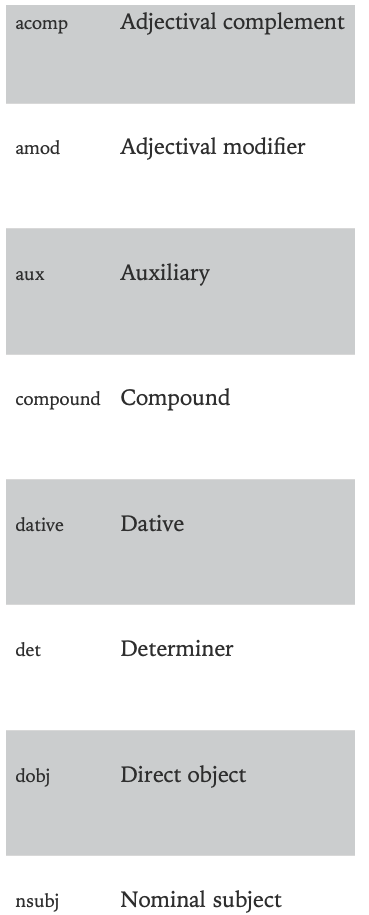

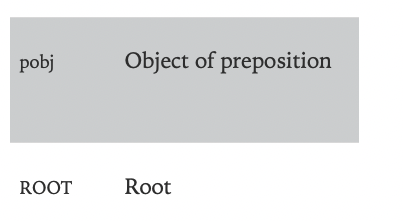

In [ ]:
print('Tokens | POS | Dependencia sintáctica' )
print('-------------------------------------' )
for token in doc:
  print(token.text, '|', token.pos_, '|', token.dep_)

Tokens | POS | Dependencia sintáctica
-------------------------------------
Veamos | VERB | ROOT
a | ADP | case
qué | PRON | obl
nos | PRON | obj
referimos | VERB | ccomp
con | ADP | case
este | DET | det
proceso | NOUN | obl
. | PUNCT | punct


 ¿Qué significa `ROOT` y qué tiene que ver esa token con las demás ?

## Ejercicios



In [ ]:
# Importar spaCy y crear el objeto nlp en español.
#import spacy

nlp = spacy.load("en_core_web_sm")

# Procesa un texto.
doc = nlp("I like tree kangaroos and narwhals.")

# Selecciona la primera token del texto.
first_token = doc[1]

# Imprime la primera token del texto.
print(first_token.text)

like


In [ ]:
# Importar spaCy y crear el objeto nlp en inglés.
#import ____

#nlp = ____

# Procesa un texto.
doc = nlp("I like tree kangaroos and narwhals.")

# Genera un corte que sólo incluya "tree kangaroos".
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# Genera un corte que sólo incluya "tree kangaroos and narwhals" sin el punto final.
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals
